# K Means Algorithm

K-Means is a popular algorithm for clustering in data science. Using non-parametrical techniques is great to define categories from a set of data. But, How it really works? We have a lot of packages showing the immediate way of using it and few information on the web about it.

In this notebook we are going to program it manually to understand what is going on and then you can implement it using other languages. I based the methodology on Christopher Bishop's book: Pattern Recognition and Machine Learning (2009). You can check the bibliography at the end. 

## Initialize the enviroment for the algorithm

To test our algorithm, we are going to use the iris dataset to see if we can classify all the iris species. The repository is available from sklearn. Just call the package and database.

In [1]:
from sklearn import datasets 
iris = datasets.load_iris()

Then, we are just to transform it into a Data Frame with pandas to do all easier.

In [2]:
import pandas as pd
iris=pd.DataFrame(iris.data)
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Is necessary for K-Means to select the number $k$ of clusters to work. For this particular case we want to set up 3 classes

In [3]:
K=3

So, will define some initial random values for this $\mu_k$ clusters. Let's see first the range of each dimension to find the limits for each $\mu_k$. 

In [4]:
import numpy as np #To calculate min and max

In [5]:
zero_min=np.min(iris.loc[:,0])
zero_max=np.max(iris.loc[:,0])

one_min=np.min(iris.loc[:,1])
one_max=np.max(iris.loc[:,1])

two_min=np.min(iris.loc[:,2])
two_max=np.max(iris.loc[:,2])

three_min=np.min(iris.loc[:,3])
three_max=np.max(iris.loc[:,3])

We are going to work with a transformation of each value, just having the integer from the multiplication by 10. This is to create the random vector easier using numpy.

In [6]:
print(int(zero_min*10),int(zero_max*10))

43 79


In [7]:
zero_min=int(zero_min*10)
zero_max=int(zero_max*10)

one_min=int(one_min*10)
one_max=int(one_max*10)

two_min=int(two_min*10)
two_max=int(two_max*10)

three_min=int(three_min*10)
three_max=int(three_max*10)

We have now all limits for each dimension in the dataset. Then, we can establish the initial values for $\mu_k$, we are going to insert all this values into a new vector called mu

In [8]:
np.random.seed(1500) #Define first a random seed to have the same results as me

In [9]:
mu=[]
for i in range(0,K):
    zeros=np.random.randint(zero_min,zero_max)
    ones=np.random.randint(one_min,one_max)
    twos=np.random.randint(two_min,two_max)
    threes=np.random.randint(three_min,three_max)
    
    mu.append([zeros,ones,twos,threes])

Then, we are going to transform centroinds into a numpy array and divide by 10 to have the $\mu_k$ to have the right values for the dataset

In [10]:
mu=np.array(mu)/10
mu

array([[6.2, 3.1, 1.1, 1.5],
       [4.5, 2.9, 2.5, 2. ],
       [5.9, 3. , 2.7, 0.8]])

Will be necessary to create a matrix to add $k$ columns. We will call them as $r_{n,k}$. Where $n$ is one single dataset observation and $k$ corresponds to each cluster defined. Consider $r_{n,k}\in\{0,1\}$

This should be look as:

In [11]:
r=np.zeros(iris.shape[0]*K).reshape(iris.shape[0],K)
r

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

## How the algorithm works?

Now, the complex step, or maybe not. We are going to define a function $J$, this will be called as distortion measure and is given by:

\begin{equation}
J=\sum_{n=1}^{N}\sum_{k=1}^{K}r_{n,k}||x_{n}-\mu_{k}
||^2
\end{equation}

Where $N$ is the total number of observations in the dataset, $K$ is the total clusters defined, \$x_n$ is each observation  and we know what $\mu_k$ and $r_{n,k}$ means. As we can see, all the dataset will be used to find the centroid vector given by $\mu_k$. There is other way to estimate the best centroids using the Robbins-Monro procedure, applying an on-line stochastic algorithm, but this will be in other moment. 

I. Our first objective is to minimize $J$ respect to $r_{n,k}$, keeping $\mu_k$ fixed. And considering the next rule:

\begin{equation}
  r_{n,k}=\begin{cases}
    1, & \text{if $k=argmin_j||x_{n}-\mu_{j}||^2$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

II. Then, we are going to minimize again $J$, but respect to $\mu_k$, keeping $r_{n,k}$ fixed. Consider the next formula:

\begin{equation}
\mu_k=\frac{\sum_n r_{n,k} x_n}{\sum_n r_{n,k}}
\end{equation}

We will do the above steps until convergence. 

In [12]:
plot_counter=0
J_plot=[]
for i in range(1,10): #For this case we only want as maximun 10 iterations
    J=0 #Initializing the distortion measure
    
    #This cicle will be to create all values for r_{n,k} using the database
    for n in range(0,iris.shape[0]): 
        x=np.array(iris.iloc[n,0:4])
        mins=[]

        for k in range(0,K):
            distance=np.linalg.norm(x-mu[k])# Using the Euclidean distance with numpy
            mins.append(distance**2) #Just add all distances into the new vector mins, this vector only keep them

        k_r=np.argmin(np.array(mins))#Here we apply the rule shown in I.
        r[n,k_r]=1 #For the otherwise case, at the end we initialize again the cicle to have a vector of zeros.
    
    #The next lines will calculate the distortion measure and keep the value of J for plot.
    for n in range(0,iris.shape[0]):
        for k in range(0,K):
            distance=np.linalg.norm(x-mu[k])
            J=r[n,k]*(distance**2)+J
    J_plot.append(J)

    #Now, we are going to update the centroids with all the mu using II. This is why is a K-Means algorithm
    for k in range(0,K):
        count_1,count_2=0,0
        for n in range(0,iris.shape[0]):
            x=np.array(iris.iloc[n,0:4])
            count_1=r[n,k]*x+count_1
            count_2=r[n,k]+count_2
        mu[k]=count_1/count_2
        
    print(J)
    #This simple rule is just to break the cicle if the previous J and the actual J don't change considerably
    if i>1 and abs(J-J_prev)<0.5:
        break
    J_prev=J
    plot_counter=1+plot_counter
    #As I said before, this reinitialize the r vector with zeros
    r=np.zeros(iris.shape[0]*K).reshape(iris.shape[0],K)

1100.879999999999
1077.8460571113642
870.987494853379
869.126836320042
923.8112637226989
925.4275481881676
925.7231759999969


Now we are going to call matplotlib to se how the J is updated and the distortion measure decreases

In [13]:
import matplotlib.pyplot as plt

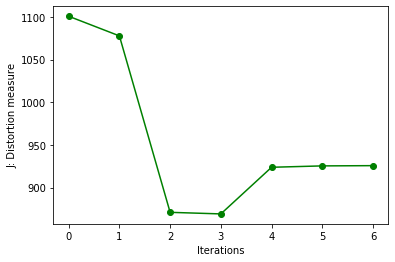

In [14]:
plt.plot(J_plot,linestyle='-', marker='o',color='green')
plt.ylabel('J: Distortion measure')
plt.xlabel('Iterations')
plt.show()

As we saw, the convergence of J is assured, but is more common to converge to a local minimum than a global one for J. This was studied by MacQueen (1967). The final vector for all centroids or mu, will be:

In [15]:
mu

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.82962963, 2.73148148, 4.31481481, 1.39259259],
       [6.76956522, 3.03695652, 5.6       , 2.00869565]])

This how looks the dataset if we only graph the features 0 and 1

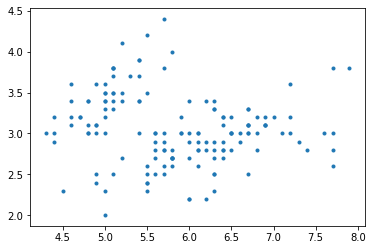

In [16]:
plt.scatter(iris[0],iris[1],marker='.')
plt.show()

If we add the centroids $\mu$ to the scatterplot we will see where are the main zones of each K category

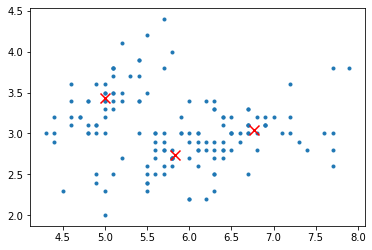

In [39]:
mu=pd.DataFrame(mu)
plt.scatter(iris[0],iris[1],marker='.')
plt.scatter(mu[0],mu[1],s=100,marker='x',color='red')
plt.show()

Now we want to know which point belongs to each of the $K=3$ categories. We need to calculate the distance of each point to each centroid $\mu$ and identify the closest. This information already exist in the $r_{n,k}$ vector after the fit. If there are a one new observation just calculate the distances of the new $x_i$ with $\mu_k$ for $k=1,2,3$ in this case.

In [34]:
r_new=[]
for row in r:
    r_new.append(np.argmax(row)+1)
iris[4]=r_new

After creating a new vector just to set the correct labels we just plot each category. The "x" mark show the centroid and the coloured area next to it is the category.

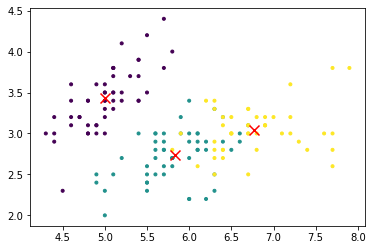

In [41]:
plt.scatter(iris[0],iris[1],c=iris[4],marker='.')
plt.scatter(mu[0],mu[1],s=100,marker='x',color='red')
plt.show()

It seems that the algorithm don't classify the closest points as part of a $\mu_k$ category. Remember that we are just plotting in 2D, the complete dataset belongs to 4D and we are using the euclidean distance. Unfortunately we just can see 3D as much.

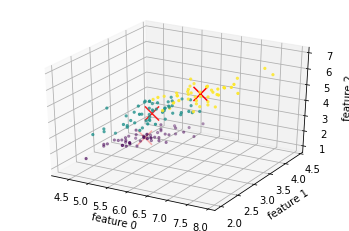

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 =iris[0]
y1 =iris[1]
z1 =iris[2]

x2=mu[0]
y2=mu[1]
z2=mu[2]

ax.scatter(x1, y1, z1, c=iris[4], marker='.')
ax.scatter(x2, y2, z2, c='red', s=200, marker='x')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 2')

plt.show()

## Bibliography

Bishop C.M (2009). Pattern recognition and machine learning. Springer Science & Business Media, pp. 424-426

MacQueen, J (1967). Some methods for classification and analysis of multivariate observations. In L.M LeCam and J. Neyman (Eds.), Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability, Volume I, pp. 281-297. University of California Press